Class distribution: Ones=220, Zeros=6599
Resampled dataset shape: (13198,)
Training Logistic Regression (with Feature Selection)...

Logistic Regression (with Feature Selection) Validation Results:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1269
           1       0.89      0.89      0.89      1371

    accuracy                           0.89      2640
   macro avg       0.89      0.88      0.89      2640
weighted avg       0.89      0.89      0.89      2640

Logistic Regression (with Feature Selection) Cross-Validation Scores: [0.89820076 0.890625   0.89535985 0.88915206 0.89057319]
Logistic Regression (with Feature Selection) Mean Accuracy: 0.8927821709515811

Logistic Regression (with Feature Selection) Test Results:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1269
           1       0.89      0.89      0.89      1371

    accuracy                           0.89  

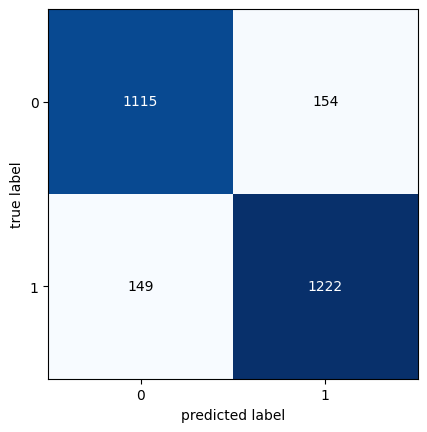

Training Random Forest...

Random Forest Validation Results:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1269
           1       0.97      0.99      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Random Forest Cross-Validation Scores: [0.96969697 0.96780303 0.96969697 0.97489342 0.96210327]
Random Forest Mean Accuracy: 0.9688387307465943

Random Forest Test Results:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1269
           1       0.97      0.99      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



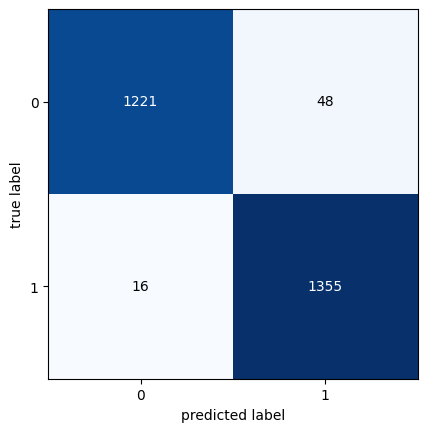

Training XGBoost...

XGBoost Validation Results:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1269
           1       0.96      0.99      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

XGBoost Cross-Validation Scores: [0.97253788 0.96969697 0.97585227 0.97773567 0.96968261]
XGBoost Mean Accuracy: 0.973101081277005

XGBoost Test Results:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1269
           1       0.96      0.99      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



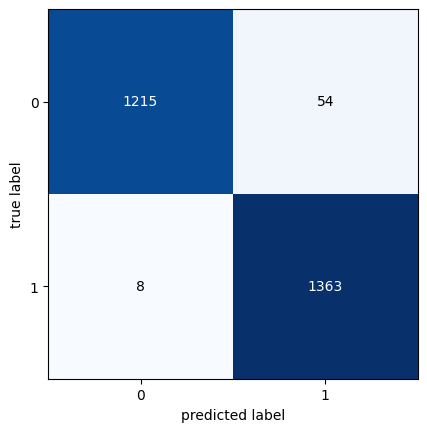

Training KNeighbourClassifier...

KNeighbourClassifier Validation Results:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1269
           1       0.89      1.00      0.94      1371

    accuracy                           0.93      2640
   macro avg       0.94      0.93      0.93      2640
weighted avg       0.94      0.93      0.93      2640

KNeighbourClassifier Cross-Validation Scores: [0.92518939 0.92424242 0.93371212 0.93368072 0.93368072]
KNeighbourClassifier Mean Accuracy: 0.9301010758939465

KNeighbourClassifier Test Results:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1269
           1       0.89      1.00      0.94      1371

    accuracy                           0.93      2640
   macro avg       0.94      0.93      0.93      2640
weighted avg       0.94      0.93      0.93      2640



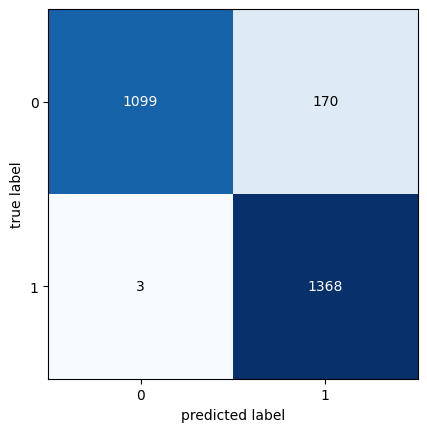

Training Deep Learning...

Deep Learning Validation Results:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1269
           1       0.95      1.00      0.97      1371

    accuracy                           0.97      2640
   macro avg       0.98      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640

Deep Learning Cross-Validation Scores: [0.97537879 0.9782197  0.9782197  0.97868309 0.97536712]
Deep Learning Mean Accuracy: 0.9771736789974591

Deep Learning Test Results:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1269
           1       0.95      1.00      0.97      1371

    accuracy                           0.97      2640
   macro avg       0.98      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640



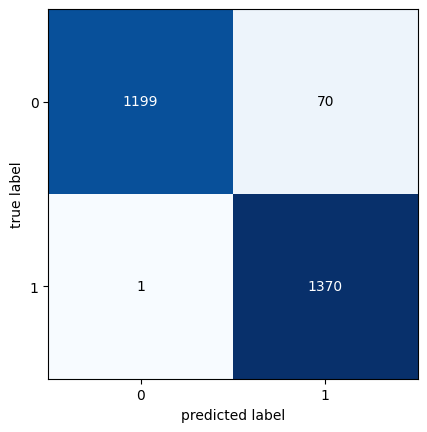


Accuracies:
Logistic Regression (with Feature Selection): 88.52%
Random Forest: 97.58%
XGBoost: 97.65%
KNeighbourClassifier: 93.45%
Deep Learning: 97.31%


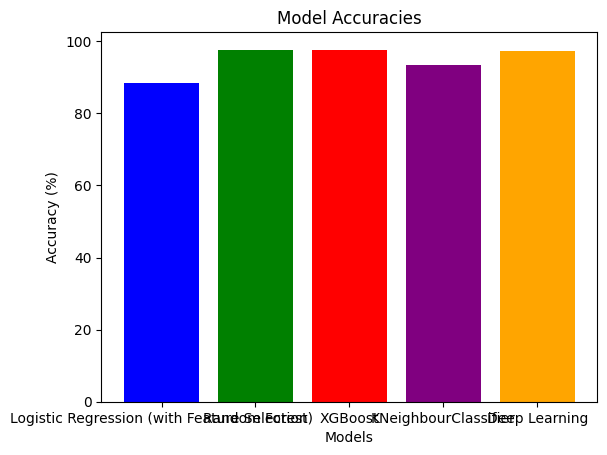

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress ConvergenceWarnings
warnings.simplefilter("ignore", ConvergenceWarning)


def load_data(file_path):
    df = pd.read_csv(file_path)
    lb = LabelEncoder()
    df['Bankrupt?'] = lb.fit_transform(df['Bankrupt?'])
    X = df.drop(['Bankrupt?'], axis=1)
    y = df['Bankrupt?']
    std = StandardScaler()
    X = std.fit_transform(X)
    return X, y


def print_class_distribution(y):
    ones = sum(y == 1)
    zeros = sum(y == 0)
    print('Class distribution: Ones={}, Zeros={}'.format(ones, zeros))


def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, name):
    print(f"Training {name}...")

    # Feature selection using Logistic Regression
    feature_selector = SelectFromModel(LogisticRegression(max_iter=1000))
    feature_selector.fit(X_train, y_train)
    X_train_selected = feature_selector.transform(X_train)
    X_test_selected = feature_selector.transform(X_test)

    # Model training and evaluation
    try:
        model.fit(X_train_selected, y_train)
    except ConvergenceWarning:
        print(f"{name} did not converge within the maximum number of iterations.")

    y_pred = model.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred) * 100

    print(f"\n{name} Validation Results:")
    print(classification_report(y_test, y_pred))

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    mean_cv_accuracy = cv_scores.mean()
    print(f"{name} Cross-Validation Scores: {cv_scores}")
    print(f"{name} Mean Accuracy: {mean_cv_accuracy}\n")

    # Test set results
    print(f"{name} Test Results:")
    print(classification_report(y_test, model.predict(X_test_selected)))

    # Confusion matrix
    cnf = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cnf)
    plt.show()

    return name, acc


def main():
    file_path = 'Dataset/data.csv'

    X, y = load_data(file_path)
    print_class_distribution(y)

    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X, y)

    print('Resampled dataset shape:', y_smote.shape)

    # Training Different Models:
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

    models = [
        [LogisticRegression(max_iter=1000), "Logistic Regression (with Feature Selection)"],
        [RandomForestClassifier(n_estimators=20), "Random Forest"],
        [XGBClassifier(objective="binary:logistic", random_state=42), "XGBoost"],
        [KNeighborsClassifier(n_neighbors=7), "KNeighbourClassifier"],
        [MLPClassifier(max_iter=500, random_state=0), "Deep Learning"]
    ]

    accuracies = []

    for model, name in models:
        result = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, name)
        accuracies.append(result)

    # Print accuracies
    print("\nAccuracies:")
    for name, acc in accuracies:
        print(f"{name}: {acc:.2f}%")

    # Plotting accuracies in a bar graph
    names, accs = zip(*accuracies)
    plt.bar(names, accs, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy (%)')
    plt.title('Model Accuracies')
    plt.show()


if __name__ == "__main__":
    main()
